<a href="https://colab.research.google.com/github/L-kiad/DO/blob/main/sentiment_analysis_tensorflowhub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


![emotions](https://s01.sgp1.cdn.digitaloceanspaces.com/article/107360-byxhzxvmlb-1544009839.jpg)


In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


### Reading data

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
from wordcloud import WordCloud, STOPWORDS
from collections import defaultdict
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/content/gdrive/MyDrive/mail_datasets/tweet_emotions.csv')
df.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


## <p style="background-color:skyblue; font-family:newtimeroman; font-size:180%; text-align:center">EDA</p>

In [4]:
def basic_eda(df, row_limit=5, list_elements_limit=10):
    ### rows and columns
    print('Info : There are {} columns in the dataset'.format(df.shape[1]))
    print('Info : There are {} rows in the dataset'.format(df.shape[0]))

    print("==================================================")

    ## data types
    print("\nData type information of different columns")
    dtypes_df = pd.DataFrame(df.dtypes).reset_index().rename(columns={0:'dtype', 'index':'column_name'})
    cat_df = dtypes_df[dtypes_df['dtype']=='object']
    num_df = dtypes_df[dtypes_df['dtype']!='object']
    print('Info : There are {} categorical columns'.format(len(cat_df)))
    print('Info : There are {} numerical columns'.format(len(dtypes_df)-len(cat_df)))

    if list_elements_limit >= len(cat_df):
        print("Categorical columns : ", list(cat_df['column_name']))
    else:
        print("Categorical columns : ", list(cat_df['column_name'])[:list_elements_limit])

    if list_elements_limit >= len(num_df):
        print("Numerical columns : ", list(num_df['column_name']))
    else:
        print("Numerical columns : ", list(num_df['column_name'])[:list_elements_limit])

    #dtypes_df['dtype'].value_counts().plot.bar()
    display(dtypes_df.head(row_limit))

    print("==================================================")
    print("\nDescription of numerical variables")

    #### Describibg numerical columns
    desc_df_num = df[list(num_df['column_name'])].describe().T.reset_index().rename(columns={'index':'column_name'})
    display(desc_df_num.head(row_limit))

    print("==================================================")
    print("\nDescription of categorical variables")

    desc_df_cat = df[list(cat_df['column_name'])].describe().T.reset_index().rename(columns={'index':'column_name'})
    display(desc_df_cat.head(row_limit))

    return

In [5]:
basic_eda(df)

Info : There are 3 columns in the dataset
Info : There are 40000 rows in the dataset

Data type information of different columns
Info : There are 2 categorical columns
Info : There are 1 numerical columns
Categorical columns :  ['sentiment', 'content']
Numerical columns :  ['tweet_id']


,column_name,dtype
0,tweet_id,int64
1,sentiment,object
2,content,object



Description of numerical variables


,column_name,count,mean,std,min,25%,50%,75%,max
0,tweet_id,40000.0,1.845184e+09,1.188579e+08,1.693956e+09,1.751431e+09,1.855443e+09,1.962781e+09,1.966441e+09



Description of categorical variables


,column_name,count,unique,top,freq
0,sentiment,40000,13,neutral,8638
1,content,40000,39827,I just received a mothers day card from my lov...,14


In [6]:
# Quickly check for mising values
total = df.isnull().sum()
total

tweet_id     0
sentiment    0
content      0
dtype: int64

### Distribution of sentiments in the data

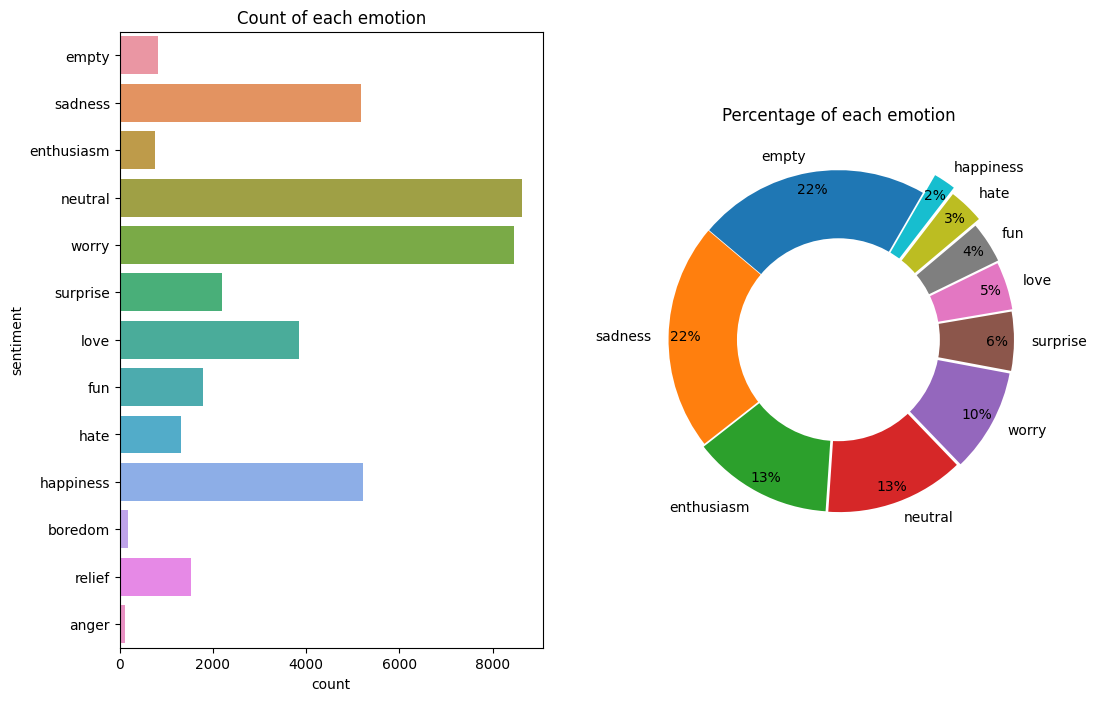

In [7]:
col = 'sentiment'
fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(12,8))
explode = list((np.array(list(df[col].dropna().value_counts()))/sum(list(df[col].dropna().value_counts())))[::-1])[:10]
labels = list(df[col].dropna().unique())[:10]
sizes = df[col].value_counts()[:10]
#ax.pie(sizes, explode=explode, colors=bo, startangle=60, labels=labels,autopct='%1.0f%%', pctdistance=0.9)
ax2.pie(sizes,  explode=explode, startangle=60, labels=labels,autopct='%1.0f%%', pctdistance=0.9)
ax2.add_artist(plt.Circle((0,0),0.6,fc='white'))
sns.countplot(y =col, data = df, ax=ax1)
ax1.set_title("Count of each emotion")
ax2.set_title("Percentage of each emotion")
plt.show()

In [8]:
df['sentiment'] = df['sentiment'].apply(lambda x: "happiness" if x in ['happiness', 'enthusiasm', 'love', 'fun'] else x)
df['sentiment'] = df['sentiment'].apply(lambda x: "anger" if x in ['anger', 'hate', 'surprise'] else x)
df['sentiment'] = df['sentiment'].apply(lambda x: "neutral" if x in ['neutral', 'empty', 'boredom', 'relief'] else x)

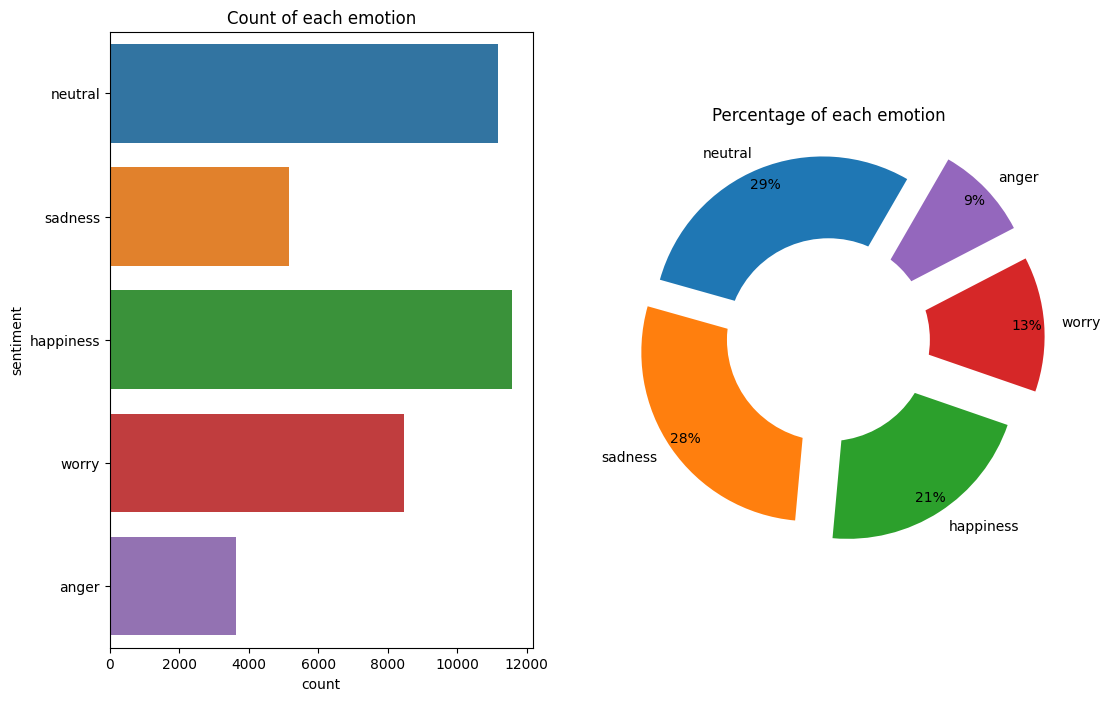

In [9]:
col = 'sentiment'
fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(12,8))
explode = list((np.array(list(df[col].dropna().value_counts()))/sum(list(df[col].dropna().value_counts())))[::-1])[:10]
labels = list(df[col].dropna().unique())[:10]
sizes = df[col].value_counts()[:10]
#ax.pie(sizes, explode=explode, colors=bo, startangle=60, labels=labels,autopct='%1.0f%%', pctdistance=0.9)
ax2.pie(sizes,  explode=explode, startangle=60, labels=labels,autopct='%1.0f%%', pctdistance=0.9)
ax2.add_artist(plt.Circle((0,0),0.6,fc='white'))
sns.countplot(y =col, data = df, ax=ax1)
ax1.set_title("Count of each emotion")
ax2.set_title("Percentage of each emotion")
plt.show()

Now we are good to go!

In [10]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42)
print(train_df['sentiment'].value_counts())
print(test_df['sentiment'].value_counts())
print(val_df['sentiment'].value_counts())

happiness    7399
neutral      7070
worry        5495
sadness      3292
anger        2344
Name: sentiment, dtype: int64
happiness    2291
neutral      2285
worry        1666
sadness      1046
anger         712
Name: sentiment, dtype: int64
happiness    1896
neutral      1815
worry        1298
sadness       827
anger         564
Name: sentiment, dtype: int64


In [11]:
import tensorflow as tf
train_data = tf.data.Dataset.from_tensor_slices((train_df['content'].values, train_df['sentiment'].values))
val_data = tf.data.Dataset.from_tensor_slices((val_df['content'].values, val_df['sentiment'].values))
test_data = tf.data.Dataset.from_tensor_slices((test_df['content'].values, test_df['sentiment'].values))
print(train_data)
print(val_data)
print(test_data)

<_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.string, name=None))>
<_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.string, name=None))>
<_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.string, name=None))>


In [16]:
BUFFER_SIZE = len(train_df)
BATCH_SIZE = 10
train_data = train_data.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)
val_data = val_data.batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)
test_data = test_data.batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)

# Affichage de quelques exemples
for features, labels in train_data.take(1):
    print("Content: ", features)
    print("Label: ", labels)

Content:  tf.Tensor(
[[b'walking by the water in annapolis with froyo and no shoes'
  b"4th may officially announced as 'bad luck day' .."
  b'woken up by a bacon and egg sandwich in bed - man I have good housemates'
  b'@steven89 I dont have one here - dunno if my mom ever had one or not -'
  b"@dougiemcfly Hi Dougie I'm your fan from Thailand. I'm Film 'Luv ur song so much"
  b"@fresa80 I'd so be in Vegas but it's on our anniversary....  Cant get enough JK!!!"
  b'@SimpleMia Yes. Need to listen to sad SP-Songs'
  b"@sassij Or he's gonna chop you up into tiny bits - one of the two"
  b'@amber_benson  Woohoo! Well Done! I started Macarena-ing too'
  b"gosh! i'm freakin' bored! talk to me!"
  b'@LesleyER Its goin good takin it easy ths weekend  Im preparing for the big events comin up for me U girls INSPIRE me 2 do great things!!'
  b'Is gonna go for a shower  goin to see hannah Montana laterz woo well excited'
  b'@doudoubebe There are 3 other Drs. in the office and only mine does this

In [13]:
train_examples_batch, train_labels_batch = next(iter(train_data.batch(1)))
print(train_examples_batch)
print(train_labels_batch)

tf.Tensor(
[[b"Tell your mom Happy mother's day ok be a good child and tell her !!!"
  b'@grahamcoltonfan hahah me too!! Except for when Haley gets hit by a car  but yay Leyton!'
  b'Yeahhhhhhhhhhhhh friday..and I work tomorrow'
  b"@southern_storm lucky! I'm still working for another 4 hours!"
  b'Comment my new myspace pictures plz?'
  b'@Chioma_ [answer 10] how i dress? its easy, my outfit is $20...yes my outfit  $10 shoes, $5 pants, $2 accessories &amp; $3 left 2 eat'
  b'@bobbyvoicu Now that sucks...  P?i ?i s? \xc3\xaf\xc2\xbf\xc2\xbdn?eleg c? Jay Leno nu va mai avea o alt? emisiune sau ceva?'
  b"@mandyyjirouxx don't forget to follow emma from london = @teamcyrus like you said you would! I wish you aswered my calls  it cost me \xc3\xaf\xc2\xbf\xc2\xbd14"
  b'now my ds just died  whatta letdown!'
  b"@dda oh look! traditional Chinese, it's so charming   I love the ? miss those shutters on the doors..."
  b"Morning  don't ask me why I'm up so early"
  b'@heyrai wow how ominious wa

In [18]:
import tensorflow_hub as hub
embedding = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(embedding, input_shape=[], dtype=tf.string, trainable=True)
hub_layer(train_examples_batch[:10])

ValueError: ignored